In [1]:
import sqlite3

import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import warnings

warnings.filterwarnings('ignore')

In [2]:
def get_data(msa: str) -> pd.DataFrame:
    msa = msa.lower()
    conn = sqlite3.connect('./db/realestate.db')
    query = f"SELECT name, date, total from building_permits where lower(name) like '%{msa}%'"

    df = pd.read_sql_query(query, conn)
    conn.close()

    print(df['name'].unique())

    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    return df

In [3]:
def resample_data(df: pd.DataFrame, how: str = 'sum', rule: str = 'Q') -> pd.DataFrame: 
    diff_data = df['total'].resample(rule=rule).mean().ffill()
    return diff_data

['Atlanta-Sandy Springs-Marietta, GA' 'Atlanta-Sandy Springs-Roswell, GA'
 'Atlanta-Sandy Springs-Alpharetta, GA']


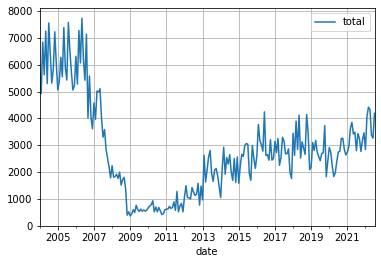

In [4]:
data = get_data('atlanta')
data.plot(grid=True)
plt.show()

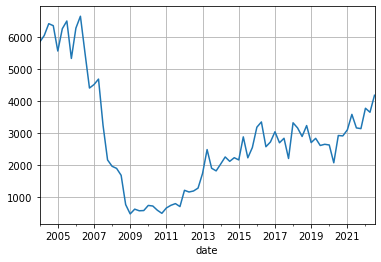

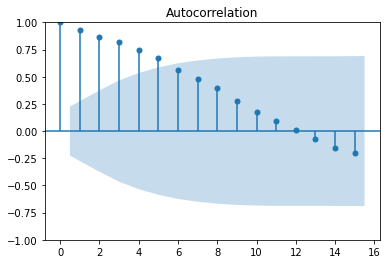

In [5]:
resampled_data = resample_data(data)

resampled_data.plot(grid=True)

plot_acf(resampled_data, alpha=0.05, lags=15)
plt.show()

In [6]:
# Run the ADF test on the price series and print out the results
results = adfuller(resampled_data)
print(results)
p_val = results[1]

# Just print out the p-value
print('The p-value of the permits data is: ' + str(p_val))

if p_val < 0.05:
    print("We can reject the null hypothesis that building permits follow a random walk, with 95% condifence.")
else:
    print("We cannot reject the null hypothesis that building permits follow a random walk, with 95% condifence.")

(-3.0479636967819044, 0.030651540204717335, 5, 69, {'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.589655654274312}, 916.3203830366649)
The p-value of the permits data is: 0.030651540204717335
We can reject the null hypothesis that building permits follow a random walk, with 95% condifence.


(-2.066609556176971, 0.25815122764483645, 4, 69, {'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.589655654274312}, -8.42608323490441)
The p-value of the permits data is: 0.25815122764483645
We cannot reject the null hypothesis that building permits follow a random walk, with 95% condifence.


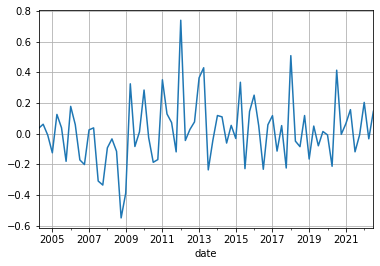

In [7]:
# Run the ADF test on the price series and print out the results
returns = resampled_data.pct_change()
returns = returns.dropna()
returns.plot(grid=True)
results = adfuller(returns)
print(results)
p_val = results[1]

# Just print out the p-value
print('The p-value of the permits data is: ' + str(p_val))

if p_val < 0.05:
    print("We can reject the null hypothesis that building permits follow a random walk, with 95% condifence.")
else:
    print("We cannot reject the null hypothesis that building permits follow a random walk, with 95% condifence.")

In [8]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(resampled_data, order=(0,3))
res = mod.fit(disp=0)

# Print out summary information on the fit
# print(res.summary())

# Print out the estimate for the constant and for phi
# print("When the true phi=0.9, the estimate of phi (and the constant) are:")
# const is the average value, ar.L1.total is phi, the degredation of the autocorrelation
# print(res.params)
res.plot_predict(start=resampled_data.index.min(), end="2023-12-31")
plt.show()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
